In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tqdm

In [5]:
# train csv contain name of images and whether its cactus or not!
data = pd.read_csv("./train.csv")

In [6]:
# lets see
data.head(5)
## here id -> image_name and has_cactus -> whether its cactus or not for same id of image

,id,has_cactus
0,0004be2cfeaba1c0361d39e2b000257b.jpg,1
1,000c8a36845c0208e833c79c1bffedd1.jpg,1
2,000d1e9a533f62e55c289303b072733d.jpg,1
3,0011485b40695e9138e92d0b3fb55128.jpg,1
4,0014d7a11e90b62848904c1418fc8cf2.jpg,1


In [7]:
# split the csv in x and y x->? image id y->class it belongs to
x = data['id']
y = data['has_cactus']

In [12]:
## first 10 image for visualization
xts = x[:10]
## image will be stored in array of ximg
ximg = []
# tqdm shows the progressbar of the process
from tqdm import tqdm
for img in tqdm(xts):
    # read the image id and find the image in train zip
    img = plt.imread("./train/"+img)
    # add image to ximg array
    ximg.append(img)


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 1999.10it/s]

In [14]:
# lets convert ximg to np.array
ximg = np.array(ximg)
# shape of image (10 image, 32 width, 32 height, 3 channels or depth)
print(ximg.shape)

(10, 32, 32, 3)


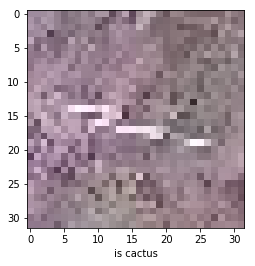

In [24]:
# create a class 0 = not cactus ,1 = is cactus
cn = ['not cactus','is cactus']
plt.figure()
## lets check 2nd image
plt.imshow(ximg[2])
# label the image
plt.xlabel(cn[y[2]])
# does not show grid
plt.grid(False)
# show or plot the image
plt.show()

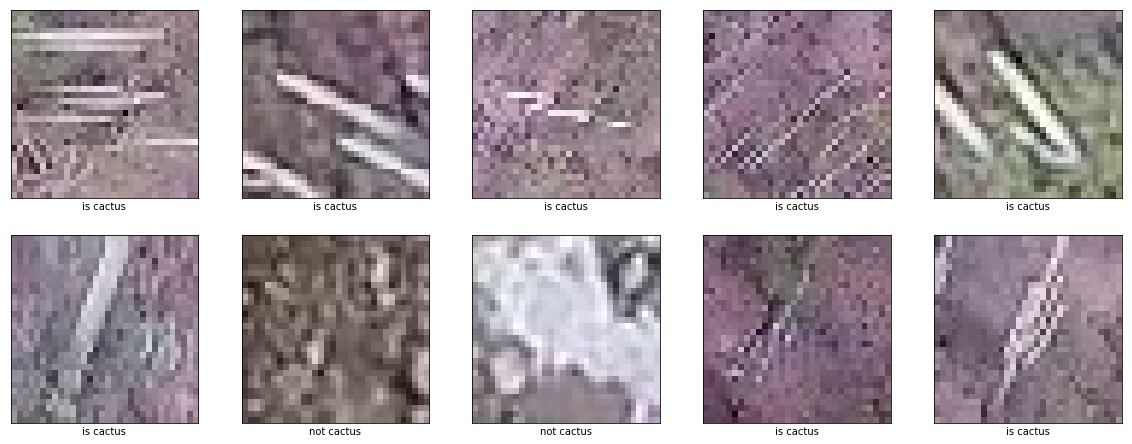

In [32]:
# all 10 image 
plt.figure(figsize=(20,20))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(ximg[i]) 
    plt.xlabel(cn[y[i]])

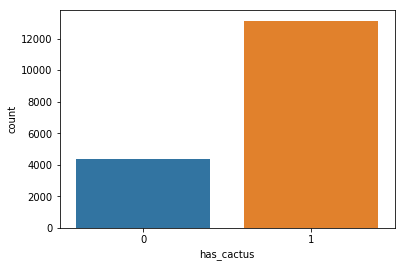

In [22]:
# are class properly balanced or not?
# there are more cactus images and less non-cactus image from below plot
sns.countplot(y)

1    13136
0     4364
Name: has_cactus, dtype: int64


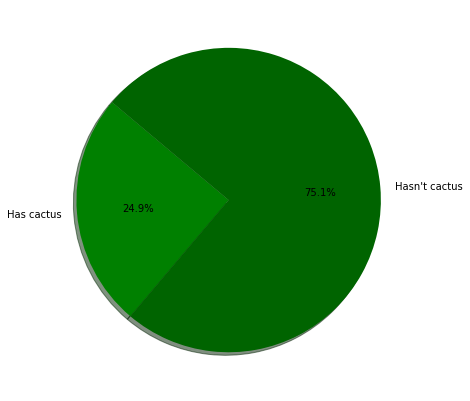

In [44]:
print(data['has_cactus'].value_counts())
lab = 'Has cactus','Hasn\'t cactus'
colors=['green','darkgreen']

plt.figure(figsize=(7,7))
plt.pie(data.groupby('has_cactus').size(), labels=lab,
        labeldistance=1.1, autopct='%1.1f%%',
        colors=colors,shadow=True, startangle=140)
plt.show()